In [117]:
from sanitize_ml_labels import sanitize_ml_labels
from tqdm.auto import tqdm

In [1]:
from crr_prediction.meta_models import build_cnn_meta_model, build_mlp_meta_model

In [167]:
meta_cnn = build_cnn_meta_model(256)
meta_ffnn = build_mlp_meta_model(256)

In [168]:
from typing import Dict
import numpy as np


def random_space_sampling(space: Dict) -> Dict:
    """Return random space uniform sample."""
    return {
        key: np.random.uniform(low, high)
        for key, (_, low, high) in space.items()
    }


In [180]:
meta_cnn.space()

{'DenseRectangularMetaLayer_1_units': ('integer', 0, 64),
 'DenseRectangularMetaLayer_1_dropout_rate': ('real', 0, 0.5),
 'DenseRectangularMetaLayer_1_layers': ('integer', 0, 3),
 'DenseRectangularMetaLayer_0_units': ('integer', 0, 64),
 'DenseRectangularMetaLayer_0_dropout_rate': ('real', 0, 0.5),
 'DenseRectangularMetaLayer_0_layers': ('integer', 0, 3),
 'Conv2DRectangularMetaLayer_1_filters': ('integer', 0, 128),
 'Conv2DRectangularMetaLayer_1_x_kernel_size': ('integer', 2, 8),
 'Conv2DRectangularMetaLayer_1_y_kernel_size': ('integer', 1, 2),
 'Conv2DRectangularMetaLayer_1_dropout_rate': ('real', 0, 0.5),
 'Conv2DRectangularMetaLayer_1_layers': ('integer', 0, 3),
 'Conv2DRectangularMetaLayer_1_x_pool_size': ('integer', 1, 8),
 'Conv2DRectangularMetaLayer_1_y_pool_size': ('integer', 1, 2),
 'Conv2DRectangularMetaLayer_0_filters': ('integer', 0, 128),
 'Conv2DRectangularMetaLayer_0_x_kernel_size': ('integer', 2, 8),
 'Conv2DRectangularMetaLayer_0_y_kernel_size': ('integer', 1, 2),
 'C

In [179]:
meta_cnn.build(**random_space_sampling(meta_cnn.space())).summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 4)]     0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 256, 4, 1)    0           input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 256, 4, 44)   352         reshape_4[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 256, 4, 44)   176         conv2d_7[0][0]                   
____________________________________________________________________________________________

In [10]:
import pandas as pd

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
report = pd.read_csv("complete_test_report.csv")
report_only_bayes = report[report.model.str.contains("bayes")]
useless_columns = ["holdout_number"]
metrics = list(report_only_bayes.columns[16:-15])
report_only_bayes = report_only_bayes.drop(columns=useless_columns)

In [130]:
for (task, cell_line, model), group in report_only_bayes.groupby(["task", "cell_line", "model"]):
    group = group.dropna(axis=1)
    display(group.drop(columns=metrics).iloc[group.AUPRC.argmax()])

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                     A549
DenseRectangularMetaLayer_0_dropout_rate                                   0.04211
DenseRectangularMetaLayer_0_layers                                             0.0
DenseRectangularMetaLayer_0_units                                             14.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.392073
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             28.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                 0.038352
Conv2DRectangularMetaLayer_0_filters                                          14.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                   A549
DenseRectangularMetaLayer_0_dropout_rate                                0.381745
DenseRectangularMetaLayer_0_layers                                           2.0
DenseRectangularMetaLayer_0_units                                          199.0
DenseRectangularMetaLayer_1_dropout_rate                                0.268752
DenseRectangularMetaLayer_1_layers                                           0.0
DenseRectangularMetaLayer_1_units                                          142.0
DenseRectangularMetaLayer_2_dropout_rate                                0.084957
DenseRectangularMetaLayer_2_layers                                           2.0
DenseRectangularMetaLayer_2_units                                          199.0
DenseRectangularMetaLayer_3_

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                  GM12878
DenseRectangularMetaLayer_0_dropout_rate                                  0.499039
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                             42.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.061601
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             28.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                 0.436823
Conv2DRectangularMetaLayer_0_filters                                         113.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                GM12878
DenseRectangularMetaLayer_0_dropout_rate                                0.373668
DenseRectangularMetaLayer_0_layers                                           0.0
DenseRectangularMetaLayer_0_units                                          199.0
DenseRectangularMetaLayer_1_dropout_rate                                0.269487
DenseRectangularMetaLayer_1_layers                                           2.0
DenseRectangularMetaLayer_1_units                                          199.0
DenseRectangularMetaLayer_2_dropout_rate                                0.360565
DenseRectangularMetaLayer_2_layers                                           3.0
DenseRectangularMetaLayer_2_units                                          170.0
DenseRectangularMetaLayer_3_

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                       H1
DenseRectangularMetaLayer_0_dropout_rate                                  0.459415
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                             42.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.075437
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             28.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                 0.392455
Conv2DRectangularMetaLayer_0_filters                                         113.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                     H1
DenseRectangularMetaLayer_0_dropout_rate                                0.097806
DenseRectangularMetaLayer_0_layers                                           0.0
DenseRectangularMetaLayer_0_units                                           28.0
DenseRectangularMetaLayer_1_dropout_rate                                0.273222
DenseRectangularMetaLayer_1_layers                                           1.0
DenseRectangularMetaLayer_1_units                                          227.0
DenseRectangularMetaLayer_2_dropout_rate                                0.010159
DenseRectangularMetaLayer_2_layers                                           1.0
DenseRectangularMetaLayer_2_units                                          227.0
DenseRectangularMetaLayer_3_

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                   HEK293
DenseRectangularMetaLayer_0_dropout_rate                                  0.498287
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                             21.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.167867
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             64.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                 0.497793
Conv2DRectangularMetaLayer_0_filters                                           0.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                 HEK293
DenseRectangularMetaLayer_0_dropout_rate                                0.421208
DenseRectangularMetaLayer_0_layers                                           1.0
DenseRectangularMetaLayer_0_units                                          170.0
DenseRectangularMetaLayer_1_dropout_rate                                 0.36652
DenseRectangularMetaLayer_1_layers                                           2.0
DenseRectangularMetaLayer_1_units                                            0.0
DenseRectangularMetaLayer_2_dropout_rate                                0.025975
DenseRectangularMetaLayer_2_layers                                           1.0
DenseRectangularMetaLayer_2_units                                           56.0
DenseRectangularMetaLayer_3_

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                    HepG2
DenseRectangularMetaLayer_0_dropout_rate                                  0.222022
DenseRectangularMetaLayer_0_layers                                             0.0
DenseRectangularMetaLayer_0_units                                             28.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.131081
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             42.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                  0.26513
Conv2DRectangularMetaLayer_0_filters                                          14.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                  HepG2
DenseRectangularMetaLayer_0_dropout_rate                                0.497968
DenseRectangularMetaLayer_0_layers                                           1.0
DenseRectangularMetaLayer_0_units                                          227.0
DenseRectangularMetaLayer_1_dropout_rate                                0.000798
DenseRectangularMetaLayer_1_layers                                           0.0
DenseRectangularMetaLayer_1_units                                          256.0
DenseRectangularMetaLayer_2_dropout_rate                                0.126665
DenseRectangularMetaLayer_2_layers                                           0.0
DenseRectangularMetaLayer_2_units                                          199.0
DenseRectangularMetaLayer_3_

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                     K562
DenseRectangularMetaLayer_0_dropout_rate                                  0.263836
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                             14.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.438729
DenseRectangularMetaLayer_1_layers                                             2.0
DenseRectangularMetaLayer_1_units                                             56.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                 0.424507
Conv2DRectangularMetaLayer_0_filters                                          14.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                   K562
DenseRectangularMetaLayer_0_dropout_rate                                0.405207
DenseRectangularMetaLayer_0_layers                                           0.0
DenseRectangularMetaLayer_0_units                                          199.0
DenseRectangularMetaLayer_1_dropout_rate                                0.247491
DenseRectangularMetaLayer_1_layers                                           1.0
DenseRectangularMetaLayer_1_units                                          227.0
DenseRectangularMetaLayer_2_dropout_rate                                0.102948
DenseRectangularMetaLayer_2_layers                                           3.0
DenseRectangularMetaLayer_2_units                                            0.0
DenseRectangularMetaLayer_3_

run_type                                                                      test
task                                          active_enhancers_vs_active_promoters
cell_line                                                                    MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                  0.391451
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                             14.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.307437
DenseRectangularMetaLayer_1_layers                                             3.0
DenseRectangularMetaLayer_1_units                                             28.0
model                                                                 bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                 0.316873
Conv2DRectangularMetaLayer_0_filters                                          56.0
Conv

run_type                                                                    test
task                                        active_enhancers_vs_active_promoters
cell_line                                                                  MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                0.313734
DenseRectangularMetaLayer_0_layers                                           1.0
DenseRectangularMetaLayer_0_units                                           85.0
DenseRectangularMetaLayer_1_dropout_rate                                0.187515
DenseRectangularMetaLayer_1_layers                                           1.0
DenseRectangularMetaLayer_1_units                                          256.0
DenseRectangularMetaLayer_2_dropout_rate                                0.347663
DenseRectangularMetaLayer_2_layers                                           1.0
DenseRectangularMetaLayer_2_units                                           56.0
DenseRectangularMetaLayer_3_

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                       A549
DenseRectangularMetaLayer_0_dropout_rate                                    0.200783
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                                7.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.446671
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               35.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.437605
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                     A549
DenseRectangularMetaLayer_0_dropout_rate                                  0.301126
DenseRectangularMetaLayer_0_layers                                             3.0
DenseRectangularMetaLayer_0_units                                              0.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.179395
DenseRectangularMetaLayer_1_layers                                             2.0
DenseRectangularMetaLayer_1_units                                             85.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.180074
DenseRectangularMetaLayer_2_layers                                             2.0
DenseRectangularMetaLayer_2_units                                              0.0
Dens

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                    GM12878
DenseRectangularMetaLayer_0_dropout_rate                                    0.052981
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                               21.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.463653
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                                0.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.256971
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                  GM12878
DenseRectangularMetaLayer_0_dropout_rate                                  0.316662
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                            227.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.220702
DenseRectangularMetaLayer_1_layers                                             0.0
DenseRectangularMetaLayer_1_units                                             56.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.076472
DenseRectangularMetaLayer_2_layers                                             2.0
DenseRectangularMetaLayer_2_units                                            170.0
Dens

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                         H1
DenseRectangularMetaLayer_0_dropout_rate                                    0.030957
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                               56.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.289422
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               14.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.257019
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                       H1
DenseRectangularMetaLayer_0_dropout_rate                                  0.306419
DenseRectangularMetaLayer_0_layers                                             0.0
DenseRectangularMetaLayer_0_units                                             56.0
DenseRectangularMetaLayer_1_dropout_rate                                   0.19866
DenseRectangularMetaLayer_1_layers                                             2.0
DenseRectangularMetaLayer_1_units                                            170.0
DenseRectangularMetaLayer_2_dropout_rate                                   0.26915
DenseRectangularMetaLayer_2_layers                                             0.0
DenseRectangularMetaLayer_2_units                                            113.0
Dens

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                     HEK293
DenseRectangularMetaLayer_0_dropout_rate                                     0.23305
DenseRectangularMetaLayer_0_layers                                               2.0
DenseRectangularMetaLayer_0_units                                                0.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.064374
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               35.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.104709
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                   HEK293
DenseRectangularMetaLayer_0_dropout_rate                                  0.083044
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                              0.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.162321
DenseRectangularMetaLayer_1_layers                                             2.0
DenseRectangularMetaLayer_1_units                                              0.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.160548
DenseRectangularMetaLayer_2_layers                                             2.0
DenseRectangularMetaLayer_2_units                                            113.0
Dens

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                      HepG2
DenseRectangularMetaLayer_0_dropout_rate                                    0.344924
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                               56.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.476003
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               14.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                    0.16945
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                    HepG2
DenseRectangularMetaLayer_0_dropout_rate                                  0.190117
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                            227.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.413884
DenseRectangularMetaLayer_1_layers                                             0.0
DenseRectangularMetaLayer_1_units                                            113.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.499799
DenseRectangularMetaLayer_2_layers                                             1.0
DenseRectangularMetaLayer_2_units                                              0.0
Dens

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                       K562
DenseRectangularMetaLayer_0_dropout_rate                                    0.298883
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                               21.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.361697
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                                0.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.041108
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                     K562
DenseRectangularMetaLayer_0_dropout_rate                                  0.473882
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                            227.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.057582
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             28.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.180791
DenseRectangularMetaLayer_2_layers                                             2.0
DenseRectangularMetaLayer_2_units                                            227.0
Dens

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                      MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                    0.378088
DenseRectangularMetaLayer_0_layers                                               2.0
DenseRectangularMetaLayer_0_units                                                0.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.444248
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               14.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.281203
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                    MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                  0.181731
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                            256.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.411138
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                             56.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.046493
DenseRectangularMetaLayer_2_layers                                             1.0
DenseRectangularMetaLayer_2_units                                            142.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                       A549
DenseRectangularMetaLayer_0_dropout_rate                                    0.148952
DenseRectangularMetaLayer_0_layers                                               1.0
DenseRectangularMetaLayer_0_units                                               28.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.345574
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               56.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.310251
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                     A549
DenseRectangularMetaLayer_0_dropout_rate                                  0.190204
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                            113.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.227852
DenseRectangularMetaLayer_1_layers                                             0.0
DenseRectangularMetaLayer_1_units                                             85.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.110008
DenseRectangularMetaLayer_2_layers                                             2.0
DenseRectangularMetaLayer_2_units                                              0.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                    GM12878
DenseRectangularMetaLayer_0_dropout_rate                                    0.112904
DenseRectangularMetaLayer_0_layers                                               2.0
DenseRectangularMetaLayer_0_units                                               35.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.430596
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                               21.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.270785
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                  GM12878
DenseRectangularMetaLayer_0_dropout_rate                                  0.152893
DenseRectangularMetaLayer_0_layers                                             0.0
DenseRectangularMetaLayer_0_units                                            142.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.171739
DenseRectangularMetaLayer_1_layers                                             3.0
DenseRectangularMetaLayer_1_units                                            256.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.387417
DenseRectangularMetaLayer_2_layers                                             0.0
DenseRectangularMetaLayer_2_units                                            256.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                         H1
DenseRectangularMetaLayer_0_dropout_rate                                    0.350583
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                                0.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.186612
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                               14.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.401993
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                       H1
DenseRectangularMetaLayer_0_dropout_rate                                  0.266074
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                            256.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.143263
DenseRectangularMetaLayer_1_layers                                             0.0
DenseRectangularMetaLayer_1_units                                            142.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.007563
DenseRectangularMetaLayer_2_layers                                             1.0
DenseRectangularMetaLayer_2_units                                            113.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                     HEK293
DenseRectangularMetaLayer_0_dropout_rate                                    0.154625
DenseRectangularMetaLayer_0_layers                                               3.0
DenseRectangularMetaLayer_0_units                                               28.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.011849
DenseRectangularMetaLayer_1_layers                                               3.0
DenseRectangularMetaLayer_1_units                                               42.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                    0.29528
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                   HEK293
DenseRectangularMetaLayer_0_dropout_rate                                  0.450985
DenseRectangularMetaLayer_0_layers                                             0.0
DenseRectangularMetaLayer_0_units                                             28.0
DenseRectangularMetaLayer_1_dropout_rate                                   0.25165
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                            113.0
DenseRectangularMetaLayer_2_dropout_rate                                   0.38272
DenseRectangularMetaLayer_2_layers                                             0.0
DenseRectangularMetaLayer_2_units                                            170.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                      HepG2
DenseRectangularMetaLayer_0_dropout_rate                                    0.048974
DenseRectangularMetaLayer_0_layers                                               2.0
DenseRectangularMetaLayer_0_units                                               21.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.114902
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                               14.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.319032
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                    HepG2
DenseRectangularMetaLayer_0_dropout_rate                                  0.096114
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                            256.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.042196
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                              0.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.088809
DenseRectangularMetaLayer_2_layers                                             0.0
DenseRectangularMetaLayer_2_units                                             85.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                       K562
DenseRectangularMetaLayer_0_dropout_rate                                    0.129582
DenseRectangularMetaLayer_0_layers                                               2.0
DenseRectangularMetaLayer_0_units                                               42.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.161689
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                               64.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.388762
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                     K562
DenseRectangularMetaLayer_0_dropout_rate                                  0.017228
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                             85.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.284986
DenseRectangularMetaLayer_1_layers                                             1.0
DenseRectangularMetaLayer_1_units                                            199.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.413328
DenseRectangularMetaLayer_2_layers                                             0.0
DenseRectangularMetaLayer_2_units                                            113.0
Dens

run_type                                                                        test
task                                          active_promoters_vs_inactive_promoters
cell_line                                                                      MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                    0.497323
DenseRectangularMetaLayer_0_layers                                               3.0
DenseRectangularMetaLayer_0_units                                               28.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.354758
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               64.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.247164
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_promoters_vs_inactive_promoters
cell_line                                                                    MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                  0.080986
DenseRectangularMetaLayer_0_layers                                             2.0
DenseRectangularMetaLayer_0_units                                            227.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.148444
DenseRectangularMetaLayer_1_layers                                             0.0
DenseRectangularMetaLayer_1_units                                              0.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.234034
DenseRectangularMetaLayer_2_layers                                             1.0
DenseRectangularMetaLayer_2_units                                            142.0
Dens

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                   A549
DenseRectangularMetaLayer_0_dropout_rate                0.154179
DenseRectangularMetaLayer_0_layers                           0.0
DenseRectangularMetaLayer_0_units                            7.0
DenseRectangularMetaLayer_1_dropout_rate                0.036625
DenseRectangularMetaLayer_1_layers                           1.0
DenseRectangularMetaLayer_1_units                            7.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.116655
Conv2DRectangularMetaLayer_0_filters                        14.0
Conv2DRectangularMetaLayer_0_layers                          2.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   5.0
Conv2DRectangularMetaLayer_0_x_pool_size                     5.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                                 A549
DenseRectangularMetaLayer_0_dropout_rate              0.211266
DenseRectangularMetaLayer_0_layers                         2.0
DenseRectangularMetaLayer_0_units                        113.0
DenseRectangularMetaLayer_1_dropout_rate              0.063068
DenseRectangularMetaLayer_1_layers                         2.0
DenseRectangularMetaLayer_1_units                          0.0
DenseRectangularMetaLayer_2_dropout_rate              0.025826
DenseRectangularMetaLayer_2_layers                         2.0
DenseRectangularMetaLayer_2_units                          0.0
DenseRectangularMetaLayer_3_dropout_rate              0.196548
DenseRectangularMetaLayer_3_layers                         0.0
DenseRectangularMetaLayer_3_units                          0.0
model                                            bayesi

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                GM12878
DenseRectangularMetaLayer_0_dropout_rate                0.096495
DenseRectangularMetaLayer_0_layers                           1.0
DenseRectangularMetaLayer_0_units                            7.0
DenseRectangularMetaLayer_1_dropout_rate                0.408108
DenseRectangularMetaLayer_1_layers                           0.0
DenseRectangularMetaLayer_1_units                           42.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.048917
Conv2DRectangularMetaLayer_0_filters                        14.0
Conv2DRectangularMetaLayer_0_layers                          2.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   5.0
Conv2DRectangularMetaLayer_0_x_pool_size                     5.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                              GM12878
DenseRectangularMetaLayer_0_dropout_rate              0.152893
DenseRectangularMetaLayer_0_layers                         0.0
DenseRectangularMetaLayer_0_units                        142.0
DenseRectangularMetaLayer_1_dropout_rate              0.171739
DenseRectangularMetaLayer_1_layers                         3.0
DenseRectangularMetaLayer_1_units                        256.0
DenseRectangularMetaLayer_2_dropout_rate              0.387417
DenseRectangularMetaLayer_2_layers                         0.0
DenseRectangularMetaLayer_2_units                        256.0
DenseRectangularMetaLayer_3_dropout_rate              0.360276
DenseRectangularMetaLayer_3_layers                         0.0
DenseRectangularMetaLayer_3_units                        142.0
model                                            bayesi

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                     H1
DenseRectangularMetaLayer_0_dropout_rate                0.372981
DenseRectangularMetaLayer_0_layers                           0.0
DenseRectangularMetaLayer_0_units                           28.0
DenseRectangularMetaLayer_1_dropout_rate                0.259078
DenseRectangularMetaLayer_1_layers                           1.0
DenseRectangularMetaLayer_1_units                           14.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.041363
Conv2DRectangularMetaLayer_0_filters                        71.0
Conv2DRectangularMetaLayer_0_layers                          2.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   8.0
Conv2DRectangularMetaLayer_0_x_pool_size                     6.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                                   H1
DenseRectangularMetaLayer_0_dropout_rate              0.457448
DenseRectangularMetaLayer_0_layers                         0.0
DenseRectangularMetaLayer_0_units                          0.0
DenseRectangularMetaLayer_1_dropout_rate              0.070917
DenseRectangularMetaLayer_1_layers                         2.0
DenseRectangularMetaLayer_1_units                        170.0
DenseRectangularMetaLayer_2_dropout_rate              0.447922
DenseRectangularMetaLayer_2_layers                         0.0
DenseRectangularMetaLayer_2_units                        142.0
DenseRectangularMetaLayer_3_dropout_rate              0.297467
DenseRectangularMetaLayer_3_layers                         0.0
DenseRectangularMetaLayer_3_units                         28.0
model                                            bayesi

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                 HEK293
DenseRectangularMetaLayer_0_dropout_rate                0.068947
DenseRectangularMetaLayer_0_layers                           1.0
DenseRectangularMetaLayer_0_units                            7.0
DenseRectangularMetaLayer_1_dropout_rate                0.213477
DenseRectangularMetaLayer_1_layers                           2.0
DenseRectangularMetaLayer_1_units                           21.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.197039
Conv2DRectangularMetaLayer_0_filters                        85.0
Conv2DRectangularMetaLayer_0_layers                          0.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   6.0
Conv2DRectangularMetaLayer_0_x_pool_size                     5.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                               HEK293
DenseRectangularMetaLayer_0_dropout_rate              0.146884
DenseRectangularMetaLayer_0_layers                         1.0
DenseRectangularMetaLayer_0_units                         56.0
DenseRectangularMetaLayer_1_dropout_rate              0.266977
DenseRectangularMetaLayer_1_layers                         0.0
DenseRectangularMetaLayer_1_units                          0.0
DenseRectangularMetaLayer_2_dropout_rate              0.065976
DenseRectangularMetaLayer_2_layers                         3.0
DenseRectangularMetaLayer_2_units                         85.0
DenseRectangularMetaLayer_3_dropout_rate              0.476122
DenseRectangularMetaLayer_3_layers                         0.0
DenseRectangularMetaLayer_3_units                         28.0
model                                            bayesi

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                  HepG2
DenseRectangularMetaLayer_0_dropout_rate                  0.4495
DenseRectangularMetaLayer_0_layers                           3.0
DenseRectangularMetaLayer_0_units                           28.0
DenseRectangularMetaLayer_1_dropout_rate                0.080504
DenseRectangularMetaLayer_1_layers                           0.0
DenseRectangularMetaLayer_1_units                           35.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.116819
Conv2DRectangularMetaLayer_0_filters                       113.0
Conv2DRectangularMetaLayer_0_layers                          0.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   3.0
Conv2DRectangularMetaLayer_0_x_pool_size                     7.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                                HepG2
DenseRectangularMetaLayer_0_dropout_rate              0.118654
DenseRectangularMetaLayer_0_layers                         0.0
DenseRectangularMetaLayer_0_units                        142.0
DenseRectangularMetaLayer_1_dropout_rate              0.172128
DenseRectangularMetaLayer_1_layers                         3.0
DenseRectangularMetaLayer_1_units                        256.0
DenseRectangularMetaLayer_2_dropout_rate               0.37846
DenseRectangularMetaLayer_2_layers                         0.0
DenseRectangularMetaLayer_2_units                        256.0
DenseRectangularMetaLayer_3_dropout_rate              0.361768
DenseRectangularMetaLayer_3_layers                         0.0
DenseRectangularMetaLayer_3_units                        142.0
model                                            bayesi

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                   K562
DenseRectangularMetaLayer_0_dropout_rate                0.002042
DenseRectangularMetaLayer_0_layers                           2.0
DenseRectangularMetaLayer_0_units                           49.0
DenseRectangularMetaLayer_1_dropout_rate                0.084356
DenseRectangularMetaLayer_1_layers                           1.0
DenseRectangularMetaLayer_1_units                           14.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.246865
Conv2DRectangularMetaLayer_0_filters                        99.0
Conv2DRectangularMetaLayer_0_layers                          0.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   8.0
Conv2DRectangularMetaLayer_0_x_pool_size                     5.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                                 K562
DenseRectangularMetaLayer_0_dropout_rate              0.059119
DenseRectangularMetaLayer_0_layers                         3.0
DenseRectangularMetaLayer_0_units                        256.0
DenseRectangularMetaLayer_1_dropout_rate              0.474768
DenseRectangularMetaLayer_1_layers                         0.0
DenseRectangularMetaLayer_1_units                         56.0
DenseRectangularMetaLayer_2_dropout_rate              0.224977
DenseRectangularMetaLayer_2_layers                         0.0
DenseRectangularMetaLayer_2_units                         85.0
DenseRectangularMetaLayer_3_dropout_rate               0.06774
DenseRectangularMetaLayer_3_layers                         0.0
DenseRectangularMetaLayer_3_units                        142.0
model                                            bayesi

run_type                                                    test
task                                          active_vs_inactive
cell_line                                                  MCF-7
DenseRectangularMetaLayer_0_dropout_rate                0.376066
DenseRectangularMetaLayer_0_layers                           3.0
DenseRectangularMetaLayer_0_units                           35.0
DenseRectangularMetaLayer_1_dropout_rate                0.328278
DenseRectangularMetaLayer_1_layers                           0.0
DenseRectangularMetaLayer_1_units                            7.0
model                                               bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate               0.440387
Conv2DRectangularMetaLayer_0_filters                        71.0
Conv2DRectangularMetaLayer_0_layers                          0.0
Conv2DRectangularMetaLayer_0_x_kernel_size                   5.0
Conv2DRectangularMetaLayer_0_x_pool_size                     4.0
Conv2DRectangularMetaLaye

run_type                                                  test
task                                        active_vs_inactive
cell_line                                                MCF-7
DenseRectangularMetaLayer_0_dropout_rate              0.246665
DenseRectangularMetaLayer_0_layers                         0.0
DenseRectangularMetaLayer_0_units                        170.0
DenseRectangularMetaLayer_1_dropout_rate              0.064422
DenseRectangularMetaLayer_1_layers                         1.0
DenseRectangularMetaLayer_1_units                         85.0
DenseRectangularMetaLayer_2_dropout_rate              0.067416
DenseRectangularMetaLayer_2_layers                         0.0
DenseRectangularMetaLayer_2_units                        227.0
DenseRectangularMetaLayer_3_dropout_rate               0.34594
DenseRectangularMetaLayer_3_layers                         2.0
DenseRectangularMetaLayer_3_units                        199.0
model                                            bayesi

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                         A549
DenseRectangularMetaLayer_0_dropout_rate                                      0.331375
DenseRectangularMetaLayer_0_layers                                                 0.0
DenseRectangularMetaLayer_0_units                                                 28.0
DenseRectangularMetaLayer_1_dropout_rate                                      0.014442
DenseRectangularMetaLayer_1_layers                                                 3.0
DenseRectangularMetaLayer_1_units                                                  7.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.304893
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                       A549
DenseRectangularMetaLayer_0_dropout_rate                                    0.220641
DenseRectangularMetaLayer_0_layers                                               3.0
DenseRectangularMetaLayer_0_units                                               85.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.038191
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               85.0
DenseRectangularMetaLayer_2_dropout_rate                                    0.175914
DenseRectangularMetaLayer_2_layers                                               0.0
DenseRectangularMetaLayer_2_units                                

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                      GM12878
DenseRectangularMetaLayer_0_dropout_rate                                      0.399664
DenseRectangularMetaLayer_0_layers                                                 0.0
DenseRectangularMetaLayer_0_units                                                 42.0
DenseRectangularMetaLayer_1_dropout_rate                                      0.153106
DenseRectangularMetaLayer_1_layers                                                 3.0
DenseRectangularMetaLayer_1_units                                                 42.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.189742
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                    GM12878
DenseRectangularMetaLayer_0_dropout_rate                                    0.121272
DenseRectangularMetaLayer_0_layers                                               1.0
DenseRectangularMetaLayer_0_units                                              113.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.103724
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                              256.0
DenseRectangularMetaLayer_2_dropout_rate                                    0.125436
DenseRectangularMetaLayer_2_layers                                               0.0
DenseRectangularMetaLayer_2_units                                

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                           H1
DenseRectangularMetaLayer_0_dropout_rate                                       0.34811
DenseRectangularMetaLayer_0_layers                                                 0.0
DenseRectangularMetaLayer_0_units                                                  7.0
DenseRectangularMetaLayer_1_dropout_rate                                      0.029727
DenseRectangularMetaLayer_1_layers                                                 3.0
DenseRectangularMetaLayer_1_units                                                 64.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.109058
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                         H1
DenseRectangularMetaLayer_0_dropout_rate                                    0.048419
DenseRectangularMetaLayer_0_layers                                               3.0
DenseRectangularMetaLayer_0_units                                               85.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.011002
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               56.0
DenseRectangularMetaLayer_2_dropout_rate                                     0.05396
DenseRectangularMetaLayer_2_layers                                               0.0
DenseRectangularMetaLayer_2_units                                

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                       HEK293
DenseRectangularMetaLayer_0_dropout_rate                                      0.141606
DenseRectangularMetaLayer_0_layers                                                 0.0
DenseRectangularMetaLayer_0_units                                                  7.0
DenseRectangularMetaLayer_1_dropout_rate                                       0.13479
DenseRectangularMetaLayer_1_layers                                                 3.0
DenseRectangularMetaLayer_1_units                                                 21.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.360357
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                     HEK293
DenseRectangularMetaLayer_0_dropout_rate                                    0.291572
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                              199.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.049299
DenseRectangularMetaLayer_1_layers                                               3.0
DenseRectangularMetaLayer_1_units                                              142.0
DenseRectangularMetaLayer_2_dropout_rate                                    0.289904
DenseRectangularMetaLayer_2_layers                                               0.0
DenseRectangularMetaLayer_2_units                                

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                        HepG2
DenseRectangularMetaLayer_0_dropout_rate                                      0.237193
DenseRectangularMetaLayer_0_layers                                                 0.0
DenseRectangularMetaLayer_0_units                                                 42.0
DenseRectangularMetaLayer_1_dropout_rate                                      0.000618
DenseRectangularMetaLayer_1_layers                                                 3.0
DenseRectangularMetaLayer_1_units                                                 35.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.350195
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                      HepG2
DenseRectangularMetaLayer_0_dropout_rate                                    0.048419
DenseRectangularMetaLayer_0_layers                                               3.0
DenseRectangularMetaLayer_0_units                                               85.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.011002
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                               56.0
DenseRectangularMetaLayer_2_dropout_rate                                     0.05396
DenseRectangularMetaLayer_2_layers                                               0.0
DenseRectangularMetaLayer_2_units                                

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                         K562
DenseRectangularMetaLayer_0_dropout_rate                                      0.247979
DenseRectangularMetaLayer_0_layers                                                 2.0
DenseRectangularMetaLayer_0_units                                                 35.0
DenseRectangularMetaLayer_1_dropout_rate                                      0.183113
DenseRectangularMetaLayer_1_layers                                                 2.0
DenseRectangularMetaLayer_1_units                                                 64.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.166279
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                       K562
DenseRectangularMetaLayer_0_dropout_rate                                    0.340959
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                               85.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.001975
DenseRectangularMetaLayer_1_layers                                               1.0
DenseRectangularMetaLayer_1_units                                               85.0
DenseRectangularMetaLayer_2_dropout_rate                                    0.094779
DenseRectangularMetaLayer_2_layers                                               1.0
DenseRectangularMetaLayer_2_units                                

run_type                                                                          test
task                                          inactive_enhancers_vs_inactive_promoters
cell_line                                                                        MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                      0.142721
DenseRectangularMetaLayer_0_layers                                                 0.0
DenseRectangularMetaLayer_0_units                                                 28.0
DenseRectangularMetaLayer_1_dropout_rate                                      0.012418
DenseRectangularMetaLayer_1_layers                                                 1.0
DenseRectangularMetaLayer_1_units                                                 49.0
model                                                                     bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                     0.277674
Conv2DRectangularMetaLayer_0_filters       

run_type                                                                        test
task                                        inactive_enhancers_vs_inactive_promoters
cell_line                                                                      MCF-7
DenseRectangularMetaLayer_0_dropout_rate                                    0.211203
DenseRectangularMetaLayer_0_layers                                               3.0
DenseRectangularMetaLayer_0_units                                               85.0
DenseRectangularMetaLayer_1_dropout_rate                                     0.44009
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                                0.0
DenseRectangularMetaLayer_2_dropout_rate                                    0.219159
DenseRectangularMetaLayer_2_layers                                               2.0
DenseRectangularMetaLayer_2_units                                

In [118]:
import os
from glob import glob

useless_columns = [
    "episodes_total",
    "timesteps_total",
    "done",
    "experiment_id",
    "date",
    "timestamp",
    "time_total_s",
    "pid",
    "hostname",
    "node_ip",
    "time_since_restore",
    "timesteps_since_restore",
    "iterations_since_restore",
    "trial_id",
    "time_this_iter_s",
    "training_iteration",
    "logdir"
]

all_csv = []

for csv_path in tqdm(glob("results/*/tuning_analyses/*/*/*.csv.gz")):
    _, model_name, _, task, cell_line, _ = csv_path.split(os.sep)
    csv = pd.read_csv(csv_path).drop(columns=useless_columns)
    csv = csv[csv.columns[12:]]
    csv.columns = [
        column[4:] if column.startswith("val_") else column
        for column in csv.columns
    ]
    csv.columns = [
        column.split("/")[1] if "/" in column else column
        for column in csv.columns
    ]
    csv["model"] = model_name
    csv["task"] = task
    csv["cell_line"] = cell_line
    all_csv.append(csv)

all_csv = pd.concat(all_csv)

  0%|          | 0/1050 [00:00<?, ?it/s]

In [183]:
wasserman_cell_lines = [
    "HepG2", "K562", "GM12878"
]

active_enhancers_vs_active_promoters CNN


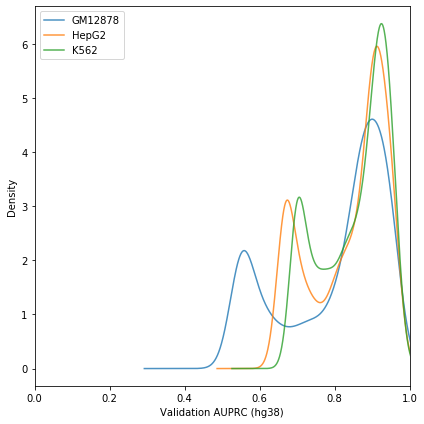

active_enhancers_vs_active_promoters MLP


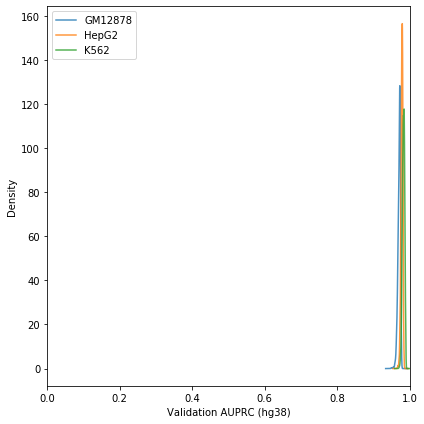

active_enhancers_vs_inactive_enhancers CNN


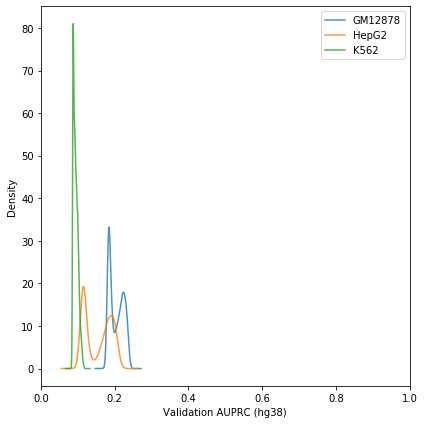

active_enhancers_vs_inactive_enhancers MLP


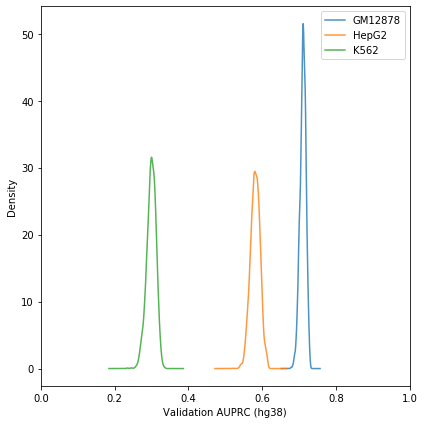

active_promoters_vs_inactive_promoters CNN


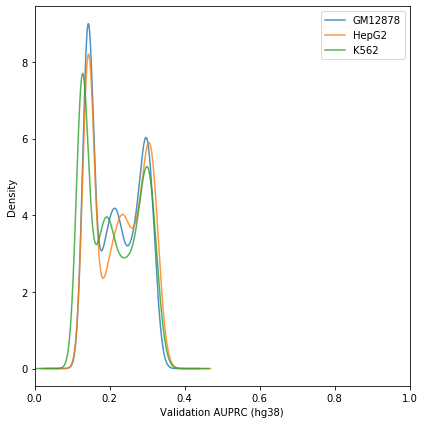

active_promoters_vs_inactive_promoters MLP


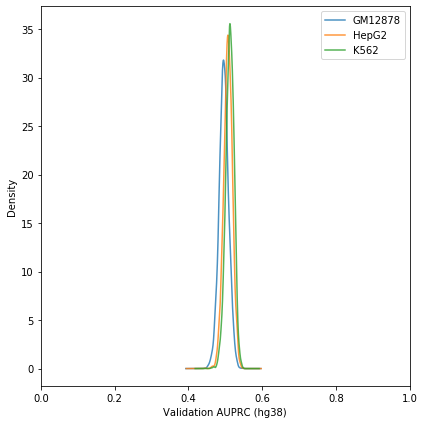

active_vs_inactive CNN


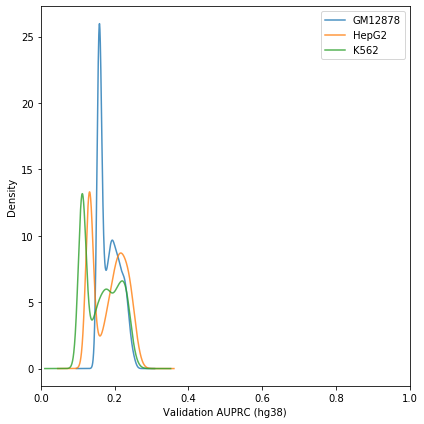

active_vs_inactive MLP


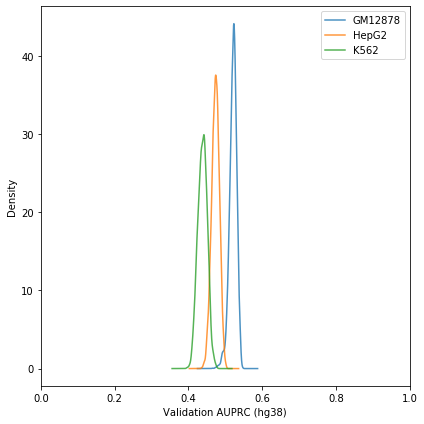

inactive_enhancers_vs_inactive_promoters CNN


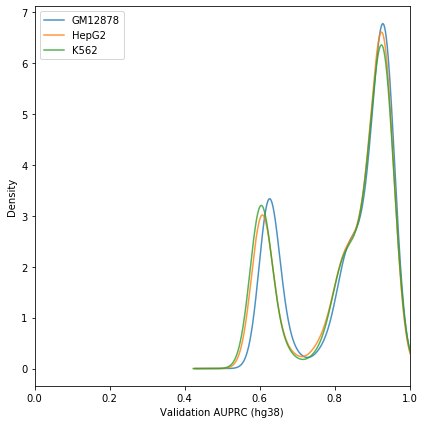

inactive_enhancers_vs_inactive_promoters MLP


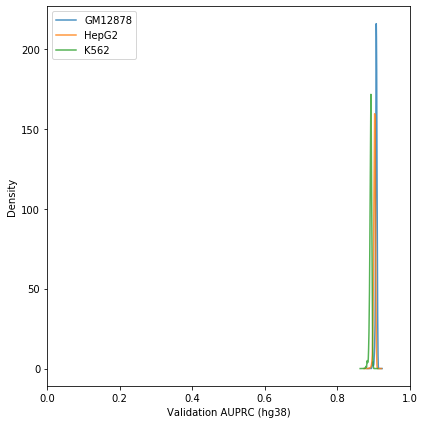

In [187]:
import os
os.makedirs("densities", exist_ok=True)
for (task, model), group in all_csv.groupby(["task", "model"]):
    print(task, model)
    group = group.dropna(axis=1)
    columns = [
        column
        for column in group.columns
        if column not in metrics
    ] + metrics
    # Resorting the dataframe
    group = group[columns]
    for cell_line, subgroup in group.groupby(["cell_line"]):
        if cell_line in wasserman_cell_lines:
            subgroup.AUPRC.plot.kde(alpha=0.8, figsize=(6, 6), label=cell_line)#, range=(0, 1))#, bins=50)
    plt.xlim(0, 1)
    plt.legend()
    plt.xlabel("Validation AUPRC (hg38)")
    plt.tight_layout()
    plt.savefig(f"./densities/{task}_{model}.jpg")
    plt.show()